In [1]:
import pandas as pd  # import package we need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data.csv') 
#%config InlineBackend.figure_format = 'retina' # high digit graph

In [2]:
bmi = df.bmi.dropna()  # getting Bmi data and drop the value nan
len(bmi)  

405058

In [6]:
def ecdf(data):
    '''get ECDF'''
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

mean of sample means: 28.11
population means: 28.04
Standard deviation of sample means: 2.13
Standard Error: 1.49


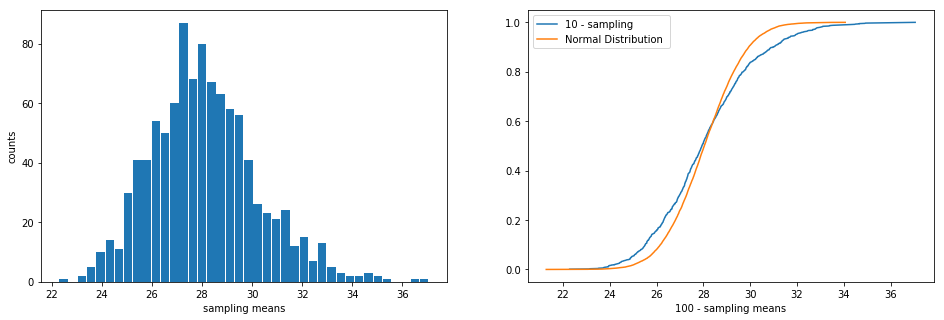

In [13]:
#getting sample data of BMI sample 10
sampling = [np.mean(np.random.choice(bmi, size=10, replace=False)) for _ in range(1000)]  
    
# gettting means and stds
mu = np.mean(bmi)
se = np.std(bmi) / np.sqrt(20)
print('mean of sample means: %.2f' % np.mean(sampling))
print('population means: %.2f' % mu)
print('Standard deviation of sample means: %.2f' % np.std(sampling))
print('Standard Error: %.2f' % se)

# hist and ECDF graphes
fig = plt.figure(figsize=(16,5))
p1 = fig.add_subplot(121)
plt.hist(sampling, bins=40, rwidth=0.9)
plt.xlabel('sampling means')
plt.ylabel('counts')
p2 = fig.add_subplot(122)
plt.plot(*ecdf(sampling),label='10 - sampling ')
sample = np.random.normal(mu, se, size=10000)
plt.xlabel('100 - sampling means')
plt.plot(*ecdf(sample),label='Normal Distribution ')
plt.legend()
plt.show()

mean of sample means: 27.97
population means: 28.04
Standard deviation of sample means: 1.41
Standard Error: 1.49


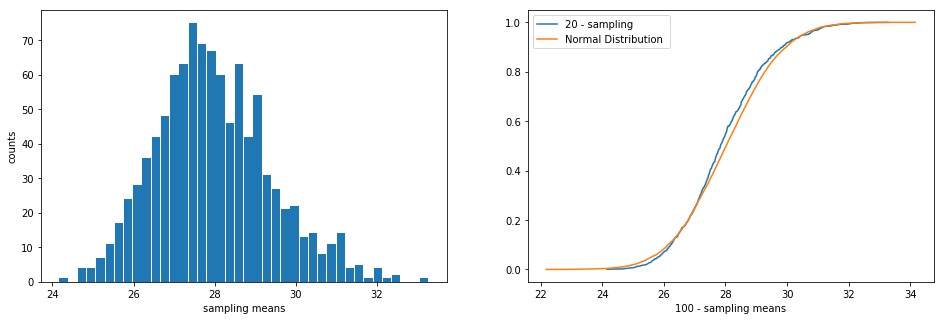

In [14]:
#getting sample data of BMI sample 20
sampling = [np.mean(np.random.choice(bmi, size=20, replace=False)) for _ in range(1000)]  
    
# gettting means and stds
mu = np.mean(bmi)
se = np.std(bmi) / np.sqrt(20)
print('mean of sample means: %.2f' % np.mean(sampling))
print('population means: %.2f' % mu)
print('Standard deviation of sample means: %.2f' % np.std(sampling))
print('Standard Error: %.2f' % se)

# hist and ECDF graphes
fig = plt.figure(figsize=(16,5))
p1 = fig.add_subplot(121)
plt.hist(sampling, bins=40, rwidth=0.9)
plt.xlabel('sampling means')
plt.ylabel('counts')
p2 = fig.add_subplot(122)
plt.plot(*ecdf(sampling),label='20 - sampling ')
sample = np.random.normal(mu, se, size=10000)
plt.xlabel('100 - sampling means')
plt.plot(*ecdf(sample),label='Normal Distribution ')
plt.legend()
plt.show()

mean of sample means: 28.08
population means: 28.04
Standard deviation of sample means: 0.69
Standard Error: 1.49


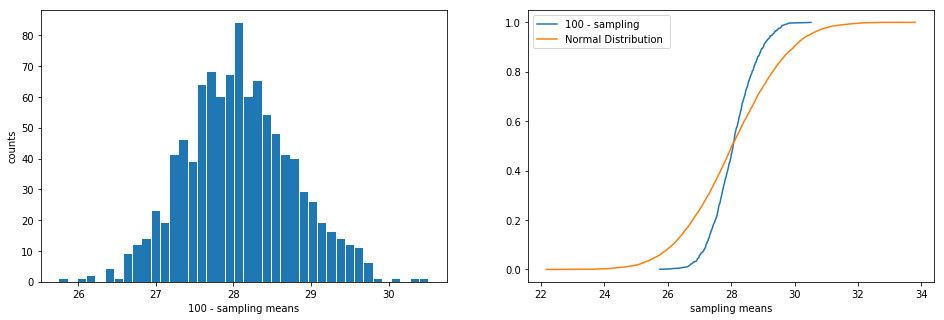

In [15]:
#getting sample data of BMI sample 100
sampling = [np.mean(np.random.choice(bmi, size=100, replace=False)) for _ in range(1000)]  
    
# gettting means and stds
mu = np.mean(bmi)
se = np.std(bmi) / np.sqrt(20)
print('mean of sample means: %.2f' % np.mean(sampling))
print('population means: %.2f' % mu)
print('Standard deviation of sample means: %.2f' % np.std(sampling))
print('Standard Error: %.2f' % se)

# hist and ECDF graphes
fig = plt.figure(figsize=(16,5))
p1 = fig.add_subplot(121)
plt.hist(sampling, bins=40, rwidth=0.9)
plt.xlabel('100 - sampling means')
plt.ylabel('counts')
p2 = fig.add_subplot(122)
plt.plot(*ecdf(sampling),label='100 - sampling ')
sample = np.random.normal(mu, se, size=10000)
plt.xlabel('sampling means')
plt.plot(*ecdf(sample),label='Normal Distribution ')
plt.legend()
plt.show()

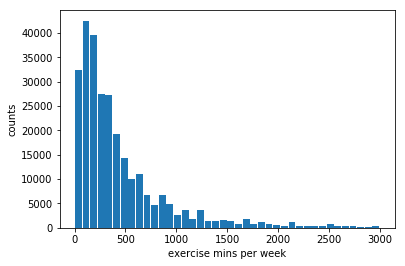

In [16]:
exemin = df[df.exemin != 0].exemin.dropna()   # Workout time and drop the nan
plt.hist(exemin,bins=40, range=(0,3000), rwidth=0.9)  # hist
plt.xlabel('exercise mins per week')
plt.ylabel('counts')
plt.show()


mean of sample means: 498.39
population means: 499.37
Standard deviation of sample means: 23.32
Standard Error: 167.97


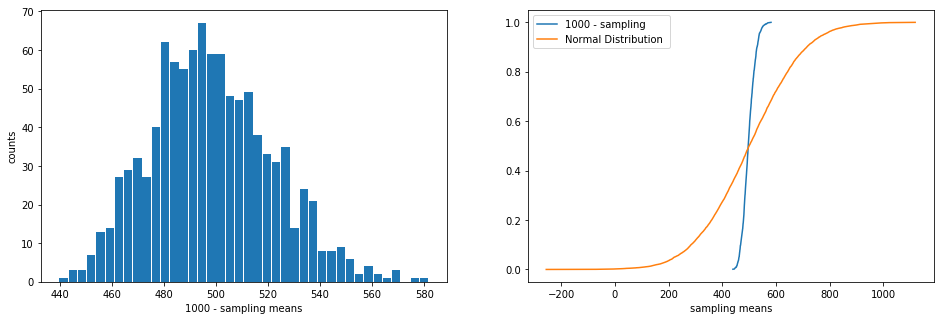

In [18]:
#getting sample data of BMI sample 1000
sampling = [np.mean(np.random.choice(exemin, size=1000, replace=False)) for _ in range(1000)]  
    
# gettting means and stds
mu = np.mean(exemin)
se = np.std(exemin) / np.sqrt(20)
print('mean of sample means: %.2f' % np.mean(sampling))
print('population means: %.2f' % mu)
print('Standard deviation of sample means: %.2f' % np.std(sampling))
print('Standard Error: %.2f' % se)

# hist and ECDF graphes
fig = plt.figure(figsize=(16,5))
p1 = fig.add_subplot(121)
plt.hist(sampling, bins=40, rwidth=0.9)
plt.xlabel('1000 - sampling means')
plt.ylabel('counts')
p2 = fig.add_subplot(122)
plt.plot(*ecdf(sampling),label='1000 - sampling ')
sample = np.random.normal(mu, se, size=10000)
plt.xlabel('sampling means')
plt.plot(*ecdf(sample),label='Normal Distribution ')
plt.legend()
plt.show()

In [19]:
import scipy.stats
norm = scipy.stats.norm()  #for better interpretate in normal distributionl, we use scipy packages


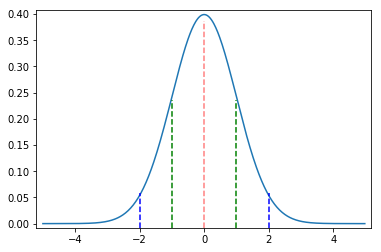

In [20]:
x = np.arange(-5, 5, 0.02)
y = norm.pdf(x)  # propobility density
plt.plot(x,y)
plt.axvline(x=0,ymax=0.95, linestyle='--', color='red', alpha=0.5)
plt.axvline(x=1,ymax=0.59, linestyle='--', color='green')
plt.axvline(x=-1,ymax=0.59, linestyle='--', color='green')
plt.axvline(x=2,ymax=0.16, linestyle='--', color='blue')
plt.axvline(x=-2,ymax=0.16, linestyle='--', color='blue')
plt.margins(0.02)
plt.show()


In [21]:
print('1 sigma : %.3f' % (norm.cdf(1) - norm.cdf(-1)))
print('2 sigma : %.3f' % (norm.cdf(2) - norm.cdf(-2)))
print('3 sigma : %.3f' % (norm.cdf(3) - norm.cdf(-3)))


1 sigma : 0.683
2 sigma : 0.954
3 sigma : 0.997


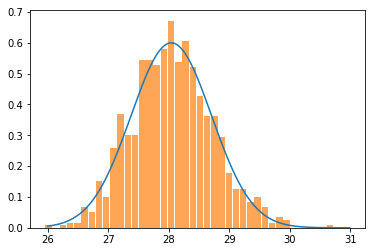

In [22]:
sample_size = 100 # picking 100 bmi per time     

# mean and std
mu = np.mean(bmi)
se = np.std(bmi) / np.sqrt(sample_size)
# pdf
norm = scipy.stats.norm(mu, se)
x = np.arange(26, 31, 0.01)
y = norm.pdf(x)
plt.plot(x,y)

# hist
sample_size = 100    
sampling = [np.mean(np.random.choice(bmi, size=sample_size, replace=False)) for _ in range(1000)]
plt.hist(sampling, bins=40, rwidth=0.9, density=True, alpha=0.7)
plt.show()



In [23]:
#by getting the range in mean of BMI
df2 = df[['bmi', 'income']].dropna()  # get people by thier income
bmi_rich = df2[df2.income == 8].bmi   # rich 
bmi_ord = df2[df2.income != 8].bmi    # normal



In [24]:
def get_interval(data,percetage):
    
    
    sample_size = len(data)
    std = np.std(data, ddof=1)  # std 
    se = std / np.sqrt(sample_size)  # std in samples   
    point_estimate = np.mean(data)  
    z_score = scipy.stats.norm.isf((1-percetage)*0.5)  # confident %
    confidence_interval = (point_estimate - z_score * se, point_estimate + z_score * se)

    return confidence_interval



In [30]:
rich = get_interval(bmi_rich,0.95)
print(rich)
print(rich[1]-rich[0])
ordin = get_interval(bmi_ord,0.95)
print(ordin)
print(ordin[1]-ordin[0])
#this one Strongly shows the the rich have better BMI

(27.41590612229476, 27.485560606043915)
0.0696544837491544
(28.509003170593907, 28.565637279855423)
0.05663410926151613


In [31]:
#if we have less data to do so
rich = get_interval(bmi_rich[:500],0.95)
print(rich)
print(rich[1]-rich[0])
ordin = get_interval(bmi_ord[:500],0.95)
print(ordin)
print(ordin[1]-ordin[0])

# the range is norrow
#this one Not Strongly shows the the rich have better BMI

(27.849838839563304, 28.791561160436636)
0.9417223208733319
(28.20054644167107, 29.303493558328935)
1.102947116657866
